# Reaction coordinate solver for 2-level bosonic system  

Author: Neill Lambert (nwlambert@gmail.com)
        Anubhav Vardhan (anubhavvardhan@gmail.com)

For more information about QuTiP see http://qutip.org

### Introduction

Reference: link.aps.org/doi/10.1103/PhysRevA.90.032114 

In this model, we take a quantum system coupled to a bosonic environment and map to a model
in which a collective mode of the environment, known as the reaction coordinate 
(RC), is incorporated within an effective system Hamiltonian. We then treat the 
residual environment within a full second-order Born-Markov master equation
formalism. Thus, all important system-bath, and indeed intrabath, correlations 
are incorporated into the system-RC Hamiltonian in the regimes we study.



In [1]:
%pylab inline
from qutip import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
from qutip import rcsolve

### Defining the 2-level system

In [3]:
Del = 1.0    # The number of qubits in the system.
wq = 0.5     # Energy of the 2-level system.
Hsys = 0.5 * wq * sigmaz() + 0.5 * Del * sigmax()

In [4]:
Q = sigmaz()

Defining the coupling Q such that:

Decoupled Hamiltonian-
#### $H_0 = \omega a^\dagger a + \frac{1}{2}\omega_q\sigma_z + \frac{1}{2}\delta\sigma_x$ 

Interaction-
#### $H_1 = g(a^\dagger + a)\sigma_z$

Total Hamiltonian-
#### $H = H_0 + H_1$

### Solving the RC master equation

In [5]:
wc = 0.05                # Cutoff frequency.
alpha = 0.1/np.pi        # Coupling strength.
N = 10                   # Number of cavity fock states.
Temperature = 1/0.95     # Tempertaure.
tlist = np.linspace(0, 40, 600)
initial_state = basis(2,1) * basis(2,1).dag()                # Initial state of the system.
return_vals = [0.5*(sigmaz()-eye(2))]            # List for which to calculate expectation value                                          
options = Options(nsteps=15000, store_states=True)        # Options for the solver.

output = rcsolve(Hsys, initial_state, tlist, return_vals, Q, wc, alpha, N, 
                Temperature, options=options)

### Plotting the TLS state occupation

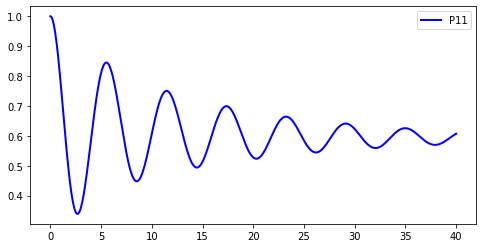

In [7]:
fig, axes = subplots(1, 1, sharex=True, figsize=(8,4))
axes.plot(tlist, -real(output.expect[0]), 'b', linewidth=2, label="P11")

axes.legend(loc=0)

### Plotting the photon distributions at arbitrary times

In [10]:
output.states[0]

Quantum object: dims = [[10, 2], [10, 2]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   6.54298105e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.0

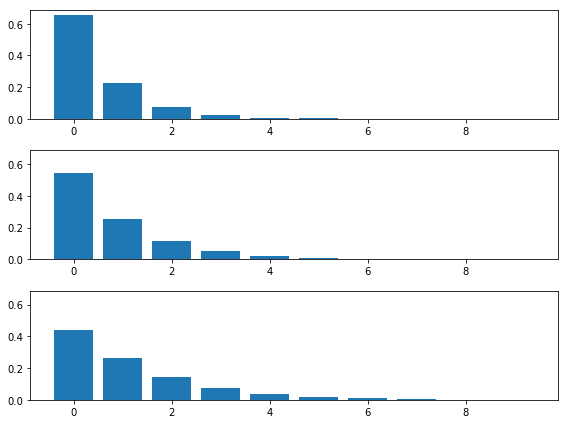

In [11]:
t_idx_vec = range(0,len(tlist),200) 

fig, axes = subplots(len(t_idx_vec), 1, sharey=True, figsize=(8,2*len(t_idx_vec)))

for idx, t_idx in enumerate(t_idx_vec):

    psi_a = ptrace(output.states[t_idx], 0)
    
    cont1 = axes[idx].bar(range(0, N), real(psi_a.diag()))
    
fig.tight_layout()

### Plotting the wigner function at arbitrary times

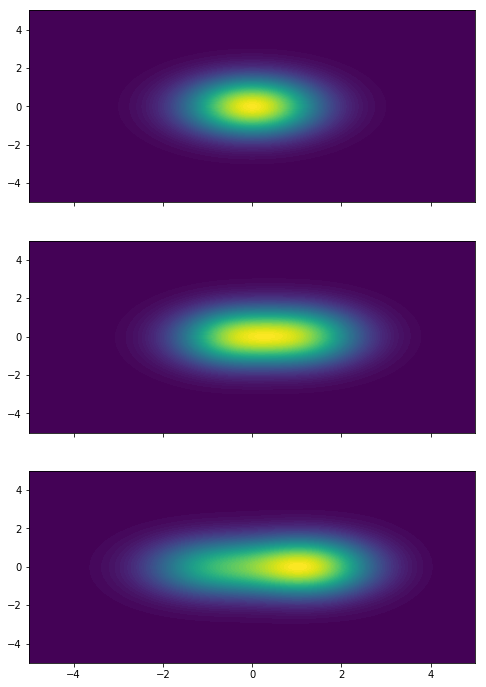

In [12]:
xvec = linspace(-5,5,200)
t_idx_vec = range(0,len(tlist),200) 

fig, axes = subplots(len(t_idx_vec), 1, sharex=True, sharey=True, figsize=(8,4*len(t_idx_vec)))

for idx, t_idx in enumerate(t_idx_vec):
    psi_a = ptrace(output.states[t_idx], 0)
    
    W_a = wigner(psi_a, xvec, xvec)
    
    
    cont1 = axes[idx].contourf(xvec, xvec, W_a, 100)
   

### Software versions

In [13]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.3.0.dev0+6e5b1d43
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.25.2
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.2 |Anaconda custom (x86_64)| (default, Jul 20 2017, 13:14:59) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
